🩺 Predict if a female patient has diabetes (1) or not (0), based on features like glucose, insulin, BMI, etc.

In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
           'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


df = pd.read_csv(url, names=columns)

print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [3]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [5]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7532467532467533
Confusion Matrix:
 [[79 20]
 [18 37]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



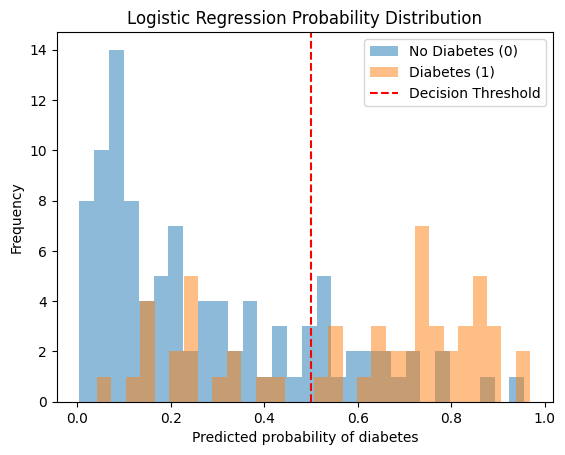

In [6]:
import matplotlib.pyplot as plt
import numpy as np

y_probs = model.predict_proba(X_test_scaled)[:, 1]

plt.hist(y_probs[y_test == 0], bins=30, alpha=0.5, label='No Diabetes (0)')
plt.hist(y_probs[y_test == 1], bins=30, alpha=0.5, label='Diabetes (1)')
plt.axvline(0.5, color='red', linestyle='--', label='Decision Threshold')
plt.legend()
plt.xlabel("Predicted probability of diabetes")
plt.ylabel("Frequency")
plt.title("Logistic Regression Probability Distribution")
plt.show()

In [7]:
for col, coef in zip(X.columns, model.coef_[0]):
    print(f"{col}: {coef:.3f}")


Pregnancies: 0.213
Glucose: 1.071
BloodPressure: -0.248
SkinThickness: 0.046
Insulin: -0.201
BMI: 0.778
DiabetesPedigreeFunction: 0.231
Age: 0.421
